<center><img src="http://mdst.eecs.umich.edu/images/mdst-logo-circle.png" width=350></center>

# Introduction to Linear Models

Linear models are some of the simplest classification techniques.  Before we continue, let's recall the distinction between regression and classification.

    Regression estimates a continuous output variable.
    
    Classification estimates a labelled output variable.
    
For many problems, either approach is valid, though frequently one will work better than the other.  Today we will briefly discuss several techniques for regression and classification for linear models.

## Data Investigation and Preparation

In [74]:
# We begin by importing numpy and pandas, as usual.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Before we get too far, let's take a look at the data that we will be working with.  You can find the data <a href="https://inclass.kaggle.com/c/mdst-flint/data">here</a>.  I recommend you create a working directory called "flint" and a subdirectory called "data" into which you can put the data.

Once you have downloaded the data and moved it into place, we can take a look at it.  You can see a description for each column at the link where you got the data.

In [53]:
train_df = pd.read_csv('./data/flint_train.csv')
train_df.head()

,sample_id,Lead_(ppb),parcel_id,Date_Submitted,google_add,Latitude,Longitude,Owner_Type,Land_Value,Land_Improvements_Value,...,Ward,PRECINCT,CENTRACT,CENBLOCK,SL_Type,SL_Type2,SL_Lead,Homestead,Homestead_Percent,HomeSEV
0,sample_012585,0.0,parcel_000036,2015-09-25 11:07:30,"1930 Colchester Rd, Flint, MI 48503, USA",42.994119,-83.723837,Private,20173,0,...,8,50,003600,6,1,0,0,Yes,100.0,35000
1,sample_006656,0.0,parcel_000036,2016-02-12 13:05:05,"1930 Colchester Rd, Flint, MI 48503, USA",42.994119,-83.723837,Private,20173,0,...,8,50,003600,6,1,0,0,Yes,100.0,35000
2,sample_007366,0.0,parcel_004160,2015-09-30 13:06:52,"605 Garland St, Flint, MI 48503, USA",43.020701,-83.696796,Private,15089,85227,...,5,32,002800,2,1,0,0,No,0.0,0
3,sample_014024,4.0,parcel_004160,2015-09-30 13:06:51,"605 Garland St, Flint, MI 48503, USA",43.020701,-83.696796,Private,15089,85227,...,5,32,002800,2,1,0,0,No,0.0,0
4,sample_003639,0.0,parcel_010786,2015-09-30 13:07:02,"4307 Ogema Ave, Flint, MI 48507, USA",42.984745,-83.660663,Private,7526,0,...,9,61,003500,3,1,0,0,Yes,100.0,0


Each of the linear models we will be examining requires all of our data to be numeric.  Let's take a look at the columns in the data frame that we just loaded.

In [10]:
train_df.columns.tolist()

['sample_id',
 'Lead_(ppb)',
 'parcel_id',
 'Date_Submitted',
 'google_add',
 'Latitude',
 'Longitude',
 'Owner_Type',
 'Land_Value',
 'Land_Improvements_Value',
 'Residential_Building_Value',
 'Residential_Building_Style',
 'Commercial_Building_Value',
 'Building_Storeys',
 'Parcel_Acres',
 'Rental',
 'Use_Type',
 'Prop_Class',
 'Year_Built',
 'USPS_Vacancy',
 'Zoning',
 'Future_Landuse',
 'DRAFT_Zone',
 'Housing_Condition_2012',
 'Housing_Condition_2014',
 'Commercial_Condition_2013',
 'Hydrant_Type',
 'Ward',
 'PRECINCT',
 'CENTRACT',
 'CENBLOCK',
 'SL_Type',
 'SL_Type2',
 'SL_Lead',
 'Homestead',
 'Homestead_Percent',
 'HomeSEV']

Some of these are already numbers. Some, however, are not but they seem like they should still be useful.  For example:

In [13]:
train_df[['Owner_Type', 'Use_Type', 'Hydrant_Type']].head()

,Owner_Type,Use_Type,Hydrant_Type
0,Private,Residential,Dar
1,Private,Residential,Dar
2,Private,Commercial,Mueller
3,Private,Commercial,Mueller
4,Private,Residential,Mueller


How can we make use of these variables?  One way is to create dummy variables.  The best way to explain dummy variables is with an example.  Thankfully, pandas has a built-in command that handles it for us.

In [18]:
pd.get_dummies(train_df[['Owner_Type', 'Use_Type', 'Hydrant_Type']]).head()

,Owner_Type_Land Bank,Owner_Type_Private,Owner_Type_Public,Use_Type_Commercial,Use_Type_Industrial,Use_Type_Residential,Hydrant_Type_A.D.,Hydrant_Type_Dar,Hydrant_Type_Mueller,Hydrant_Type_Other,Hydrant_Type_T.C.
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


This is also called "one-hot encoding" if you want to sound fancy.  In your own words below, describe what the get_dummies command is doing.

To save you time and boredom, we have identified the variables that should be dummies below and created a new data frame.  In the process we dropped columns that will not be useful.

In [54]:
dummy_columns = ['Owner_Type', 'Residential_Building_Style', 'USPS_Vacancy', 
                 'Building_Storeys', 'Rental', 'Use_Type', 'Prop_Class', 'Zoning', 'Future_Landuse', 'DRAFT_Zone',
                 'Housing_Condition_2012', 'Housing_Condition_2014','Hydrant_Type', 'Ward', 'PRECINCT', 'CENTRACT', 
                 'Commercial_Condition_2013','CENBLOCK', 'SL_Type', 'SL_Type2', 'SL_Lead', 'Homestead']

drop_columns = ['sample_id', 'google_add', 'parcel_id', 'Date_Submitted']

train_df = train_df.drop(drop_columns, axis=1)
train_df = pd.get_dummies(train_df, columns=dummy_columns)

Now we create our train/test split for the classification problem.

In [55]:
from sklearn.cross_validation import train_test_split

Ydata_r = train_df['Lead_(ppb)']
Ydata_c = train_df['Lead_(ppb)'] > 15
Xdata = train_df.drop('Lead_(ppb)', axis=1)

# Describe the difference between Ydata_r and Ydata_c
#

In [56]:
# We'll be starting with a regression problem, so split on Ydata_r

Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xdata, Ydata_r)

## Linear Regression

Remember how we said that data prep is always most of the work?  Maybe you are starting to get a clearer picture of that.

Sklearn has sevearl linear regression libraries coded up and ready to go for us.  We will using two different models, but you can find many more <a href="http://scikit-learn.org/stable/modules/linear_model.html">here</a>.

In [57]:
from sklearn.linear_model import LinearRegression, Ridge

# Create linear regression and ridge regression models
lr = LinearRegression()
rg = Ridge()

# Fit the models to the data

lr.fit(Xtrain, Ytrain)
rg.fit(Xtrain, Ytrain)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
# Now we can predict using the trained models.

yhat1 = lr.predict(Xtest)
yhat2 = rg.predict(Xtest)

In [60]:
# How well did we do?  One way to measure is to check the mean squared error.

from sklearn.metrics import mean_squared_error as mse

error1 = mse(Ytest, yhat1)
error2 = mse(Ytest, yhat2)

print(error1, error2)

22446.8963463 22356.4091028


This is not very good, but it's something.  Let's try something else.

In [67]:
from sklearn.metrics import confusion_matrix as cm

pd.DataFrame(cm(Ytest > 15, yhat1 > 15))

,0,1
0,1557,861
1,112,87


In [68]:
pd.DataFrame(cm(Ytest > 15, yhat2 > 15))

,0,1
0,1538,880
1,110,89


## Logistic Regression

Logistic regression is a classification tool, not a regression tool.  It can also capture more complicated structure.

In [72]:
from sklearn.linear_model import LogisticRegression

# Create a new train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xdata, Ydata_c)

lr = LogisticRegression()

lr.fit(Xtrain, Ytrain)

yhat = lr.predict_proba(Xtest)

In [78]:
from sklearn.metrics import roc_auc_score as roc
from sklearn.metrics import roc_curve

r = roc(Ytest, yhat[:,1])
print(r)

0.540698129962


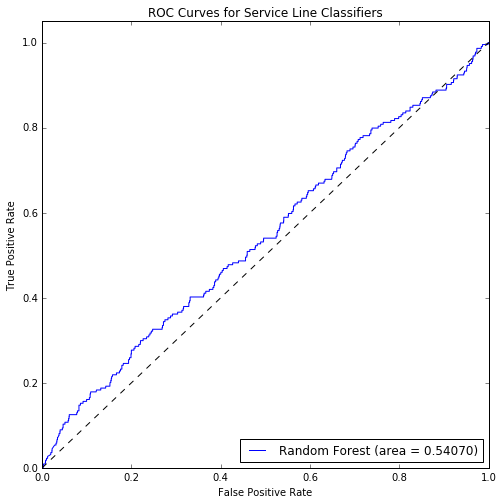

In [79]:
fig = plt.figure()
fig.set_size_inches(8,8)

fpr, tpr, _ = roc_curve(Ytest, yhat[:,1])
plt.plot(fpr, tpr, label= 'Random Forest (area = %0.5f)' % r)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Service Line Classifiers')
plt.legend(loc="lower right")

plt.show()

In [ ]:
# Now let's make a submission together.